This image is: <class 'numpy.ndarray'> with dimensions: (540, 960, 3)


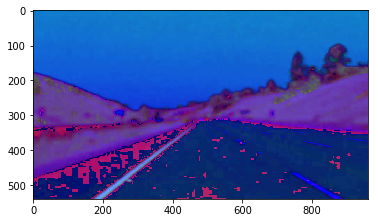

In [21]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import math
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

#import PIL
from PIL import Image

%matplotlib inline

#reading in an image
#image = mpimg.imread('test_images/solidWhiteRight.jpg')
#image = mpimg.imread('test_images/solidWhiteCurve.jpg')
#image = mpimg.imread('test_images/solidYellowCurve.jpg')

#image = mpimg.imread('test_images/solidYellowCurve2.jpg')
#image = mpimg.imread('test_images/solidYellowLeft.jpg')

image = mpimg.imread('test_images/whiteCarLaneSwitch.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)



#printing out some stats and plotting
print('This image is:', type(image), 'with dimensions:', image.shape)
plt.imshow(image)  # if you wanted to show a single color channel image called 'gray', for example, call as plt.imshow(gray, cmap='gray')

In [22]:
def grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def canny(img, low_threshold, high_threshold):
    """Applies the Canny transform"""
    return cv2.Canny(img, low_threshold, high_threshold)

def gaussian_blur(img, kernel_size):
    """Applies a Gaussian Noise kernel"""
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

In [23]:
def region_of_interest(img, vertices):
    """
    Applies an image mask.
    
    Only keeps the region of the image defined by the polygon
    formed from `vertices`. The rest of the image is set to black.
    """
    #defining a blank mask to start with
    mask = np.zeros_like(img)   
    
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    #filling pixels inside the polygon defined by "vertices" with the fill color    
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

In [24]:
gray_image = grayscale(image)

blur_image = gaussian_blur (gray_image, 7)

canny_image = canny(blur_image, 70, 140)

points = np.array([[0, 600], [400, 320], [600, 320], [1000, 600]])
# points.dtype => 'int64'
#cv2.polylines(img, , 1, (255,255,255))
masked_image = region_of_interest(canny_image,np.int32([points]) )




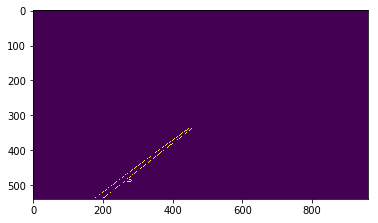

In [25]:
plt.imshow(canny_image) 

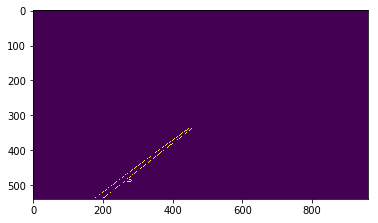

In [26]:
plt.imshow(masked_image) 

In [27]:
#remove the line segments that have different slope from than the existing ones
#the ones on the left should have positive slope while the line segments in the right half should have negative slop



In [37]:
def draw_lines_modified (line_img, lines,color=[255, 0, 0], thickness=4):
    count = 0 
    count1 = 0
    left_x1 = lefty1 = left_x2 = left_y2 = 0
    right_x1 = right_x2 = right_y1 = right_y2 = 0
    
    
    for line in lines:
        for x1,y1,x2,y2 in line:
                
                slope = (y2-y1)/(x2-x1)
                #print(slope)
                if (slope < 0):
                    if (x2 > 500):
                        continue
                    if (x1 > 500):
                        continue
                    #print(x1, y1, x2, y2)
                    #cv2.line(line_img, (x1, y1), (x2, y2), color, thickness)
                    
                    if (count == 0):
                        left_x1 = x1
                        left_y1 = y1
                        left_x2 = x2
                        left_y2 = y2
                        count = count + 1
                        
                    else:
                        if (x1 < left_x1):
                            left_x1 = x1
                            left_y1 = y1
                        if (x2 > left_x2):
                            left_x2 = x2
                            left_y2 = y2
                    
                        
                    
                    
                    
                    
                elif (slope > 0):
                    if (x2 < 500):
                        continue
                    if (x1 < 500):
                        continue
                    #cv2.line(line_img, (x1, y1), (x2, y2), color, thickness)
                    #print(x1, y1, x2, y2)
                    #cv2.line(line_img, (x1, y1), (x2, y2), color, thickness)
                    
                    if (count1 == 0):
                        right_x1 = x1
                        right_y1 = y1
                        right_x2 = x2
                        right_y2 = y2
                        count1 = count1 + 1
                        
                    else:
                        if (x1 < right_x1):
                            right_x1 = x1
                            right_y1 = y1
                        if (x2 > right_x2):
                            right_x2 = x2
                            right_y2 = y2
                    
                

                else:
                    print("first pass done...")
    #cv2.line(line_img, (left_x1, left_y1), (left_x2, left_y2), color, thickness)
    #cv2.line(line_img, (right_x1, right_y1), (right_x2, right_y2), color, thickness)
    
    #print (left_x1, left_y1, left_x2, left_y2)
    #print(right_x1, right_y1, right_x2, right_y2)

    slope_left = (left_y2-left_y1)/(left_x2-left_x1)
    c_left = left_y2-(slope_left*left_x2)
    new_left_y3 = 500;#y=mx+c
    new_left_x3 = (int)(new_left_y3-c_left)/slope_left
    new_left_x3 = int(new_left_x3)
    #print (new_left_x3, new_left_y3, left_x2, left_y2)

    #cv2.line(line_img, (new_left_x3, new_left_y3), (left_x2, left_y2), color, thickness)
    
    new_left_y4 = 330;#y=mx+c
    new_left_x4 = (int)(new_left_y4-c_left)/slope_left
    new_left_x4 = int(new_left_x4)
    #print (new_left_x3, new_left_y3, left_x2, left_y2)

    cv2.line(line_img, (new_left_x3, new_left_y3), (new_left_x4, new_left_y4), color, thickness)
    
    #slope_right = (right_y2-right_y1)/(right_x2-right_x1)
    #c_right = right_y2-(slope_right*right_x2)
    #new_right_y3 = 500;#y=mx+c
    #new_right_x3 = (int)(new_right_y3-c_right)/slope_right
    #new_right_x3 = int(new_right_x3)
    #print (new_right_x3, new_right_y3, right_x2, right_y2)


    #cv2.line(line_img, (new_right_x3, new_right_y3), (right_x2, right_y2), color, thickness)
   
    #new_right_y4 = 360;#y=mx+c
    #new_right_x4 = (int)(new_right_y4-c_right)/slope_right
    #new_right_x4 = int(new_right_x4)
    #print (new_right_x3, new_right_y3, right_x2, right_y2)


    #cv2.line(line_img, (new_right_x3, new_right_y3), (new_right_x4, new_right_y4), color, thickness)



    

In [38]:
def hough_lines_mod(img, rho, theta, threshold, min_line_len, max_line_gap):
    """
    `img` should be the output of a Canny transform.
        
    Returns an image with hough lines drawn.
    """
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    draw_lines_modified(line_img, lines)
    return line_img

In [39]:
hough_image = hough_lines_mod(masked_image, 2, 1, 15, 20, 80)


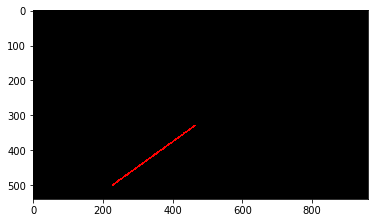

In [40]:
plt.imshow(hough_image) 

In [41]:
def weighted_img(img, initial_img, α=0.8, β=1., λ=0.):
    """
    `img` is the output of the hough_lines(), An image with lines drawn on it.
    Should be a blank image (all black) with lines drawn on it.
    
    `initial_img` should be the image before any processing.
    
    The result image is computed as follows:
    
    initial_img * α + img * β + λ
    NOTE: initial_img and img must be the same shape!
    """
    return cv2.addWeighted(initial_img, α, img, β, λ)

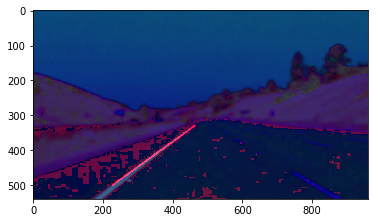

In [42]:
lanes_on_image = weighted_img(hough_image, image, 0.6, 5, 0)
plt.imshow(lanes_on_image) 

In [43]:
def process_image(image_input):
    # NOTE: The output you return should be a color image (3 channel) for processing video below
    # TODO: put your pipeline here,
    # you should return the final output (image where lines are drawn on lanes)
    new_width  = 1280
    new_height = 720
    #image = image_input.resize((new_width, new_height), PIL.Image.ANTIALIAS)
    
    image1 = cv2.resize(image_input, (1000, 539)) 
    image = cv2.cvtColor(image1, cv2.COLOR_BGR2HSV)



    
    gray_image = grayscale(image)

    blur_image = gaussian_blur (gray_image, 7)

    canny_image = canny(blur_image, 70, 140)

    points = np.array([[50, 530], [400, 320], [530, 320], [1000, 530]])
# points.dtype => 'int64'
#cv2.polylines(img, , 1, (255,255,255))
    masked_image = region_of_interest(canny_image,np.int32([points]) )
    
    hough_image = hough_lines_mod(masked_image, 2, 1, 15, 20, 80)
    lanes_on_image = weighted_img(hough_image, image, 0.6, 5, 0)



    return lanes_on_image

In [44]:
#white_output = 'test_videos_output/solidWhiteRight.mp4'
#white_output = 'test_videos_output/solidYellowLeft.mp4'
white_output = 'test_videos_output/challenge.mp4'


## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4").subclip(0,5)




#clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4")
#clip1 = VideoFileClip("test_videos/solidYellowLeft.mp4")
clip1 = VideoFileClip("test_videos/challenge.mp4")#.subclip(0,3)






white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)




[MoviePy] >>>> Building video test_videos_output/challenge.mp4
[MoviePy] Writing video test_videos_output/challenge.mp4


100%|██████████| 251/251 [00:13<00:00, 18.67it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos_output/challenge.mp4 

CPU times: user 14.9 s, sys: 360 ms, total: 15.3 s
Wall time: 14.8 s


In [45]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))